In [1]:
%cd /data/mayu-ot/Experiments/neurocomp_vgp/

/data/mayu-ot/Experiments/neurocomp_vgp


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import f1_score, precision_score, recall_score
import pandas as pd
from sklearn.linear_model import LogisticRegression
from chainercv.utils import bbox_iou
import numpy as np
from chainercv.visualizations import vis_bbox

In [4]:
def bbox_iou(bbox_a, bbox_b):
    tl = np.maximum(bbox_a[:, :2], bbox_b[:, :2])
    br = np.minimum(bbox_a[:, 2:], bbox_b[:, 2:])

    area_i = np.prod(br - tl, axis=1) * (tl < br).all(axis=1)
    area_a = np.prod(bbox_a[:, 2:] - bbox_a[:, :2], axis=1)
    area_b = np.prod(bbox_b[:, 2:] - bbox_b[:, :2], axis=1)

    iou = area_i / (area_a + area_b - area_i)
    return iou

In [3]:
train_df = pd.read_csv('data/raw/train.csv')

In [5]:
bbox_a = train_df[['ddpn_ymin_1', 'ddpn_xmin_1', 'ddpn_ymax_1', 'ddpn_xmax_1']].values
bbox_b = train_df[['ddpn_ymin_2', 'ddpn_xmin_2', 'ddpn_ymax_2', 'ddpn_xmax_2']].values

(array([864802., 315298., 228437., 166221., 127186.,  99463.,  80976.,
         72968.,  71841.,  41492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

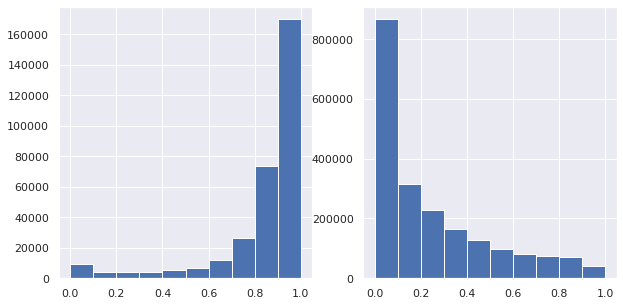

In [7]:
iou = bbox_iou(bbox_a, bbox_b)
f, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(iou[train_df.ytrue.values == True])
axes[1].hist(iou[train_df.ytrue.values == False])

In [8]:
lr_model = LogisticRegression()
lr_model.fit(iou[:, None], train_df.ytrue.values)

/data/mayu-ot/miniconda3/envs/neurocomp_vgp/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
test_df = pd.read_csv('data/raw/test.csv')

bbox_a = test_df[['ddpn_ymin_1', 'ddpn_xmin_1', 'ddpn_ymax_1', 'ddpn_xmax_1']].values
bbox_b = test_df[['ddpn_ymin_2', 'ddpn_xmin_2', 'ddpn_ymax_2', 'ddpn_xmax_2']].values

iou = bbox_iou(bbox_a, bbox_b)

In [10]:
pred_y = lr_model.predict(iou[:, None])

In [16]:
f1 = f1_score(test_df.ytrue.values, pred_y)
pre = precision_score(test_df.ytrue.values, pred_y)
rec = recall_score(test_df.ytrue.values, pred_y)

print("F1: %.2f, Prec: %.2f, Rec: %.2f"%(100*f1, 100*pre, 100*rec))

F1: 73.43, Prec: 73.83, Rec: 73.05
